# Parcial computacional sobre Test de Hipótesis

## Alumna: Maria Sol Vidal

### **2.** Estadística en la calle
$\hspace{1cm}$
<div style="text-align: justify">
Desde el 1 de abril de 2016, los automóviles de nuestro pais se patentan con un nuevo
sistema, éste es de la forma L1L2 N1N2N3 L3L4 donde L son letras y N son números.
Así, esta nueva notación, que comenzó con AA000AA, luego AA000AB, ..., AA000ZZ,
AA001AA, etc, terminará con ZZ999ZZ.</div>
$\hspace{1cm}$
<div style="text-align: justify">
Hay muchas preguntas que uno podría pretender responder con sólo mirar patentes,
como por ejemplo, ¿es uniforme la distribución de patentes? ¿puedo estimar la patente
más nueva en circulación? ¿los autos de un barrio, son en promedio más nuevos que los
de otro? lo que aprendimos en MEFE nos puede ayudar a responder esas preguntas, y
muchas más.</div>
$\hspace{1cm}$
<div style="text-align: justify">
Para eso te vamos a pedir, en primer lugar, un pequeño trabajo de campo, que consiste
en sentarte en una plaza o un café y anotar patentes nuevas que veas en circulación
(prohibido hacerlo manejando!). Cuantas más patentes anotes, mas representativos serán
tus resultados y más fácil la aplicación de los test porque, en muchos de ellos, podrás
usar la aproximación gaussiana para la distribución del estadístico.</div>
$\hspace{1cm}$
<div style="text-align: justify">
Una vez que tengas tu muestra, deberás transformar cada una de las k patentes observadas en un número natural, asignando el 1 a la patente AA000AA, el 2 a la AA000AB y así sucesivamente, hasta llegar a m, el natural correspondiente a la patente más nueva
que hayas visto. Una vez que tengas la lista, estarás en condiciones de empezar el parcial.</div>


<div style="text-align: justify">
En primer lugar, las patentes que voy a utilizar como mi muestra las anote en la esquina de Av. La Plata y Av. Rivadavia, barrio de Caballito, Ciudad Autónoma de Buenos Aires. Llegué a anotar 251 patentes, sin repeticiones.</div> 
$\hspace{1cm}$
<div style="text-align: justify"> Una vez hecho eso, el paso siguiente era asignarle un número natural a cada patente. Para eso, pense en descomponer la patente en una ¨base mixta 10-26¨, ya que hay 10 números (incluyendo al cero) y 26 letras (no hay patentes con ñ). La función $patente_a_natural$ convierte una patente en un natural. </div>
$\hspace{1cm}$
<div style="text-align: justify"> A continuación, chequeo que la función $patente_a_natural$ entregue el natural correcto, por ejemplo, para las patentes AA000AA y ZZ999ZZ (los extremos).</div>

In [1]:
import numpy as np
import scipy as sp 
from scipy import stats
from matplotlib import pyplot as plt 
%matplotlib inline 
import string

In [2]:
def patente_a_natural(patente):
    values = dict()
    for index, letter in enumerate(string.ascii_uppercase):
        values[letter] = index 
    numeros = {"0" : 0,"1" : 1,"2" : 2,"3" : 3,"4" : 4,"5" : 5,"6" : 6,"7" : 7,"8" : 8,"9" : 9}
    nu=values[patente[0]]*(26**3)*(10**3)+values[patente[1]]*(26**2)*(10**3)+numeros[patente[2]]*(26**2)*(10**2)+numeros[patente[3]]*(26**2)*10+numeros[patente[4]]*(26**2)+values[patente[5]]*26+values[patente[6]]+1
    return nu

In [3]:
patente_a_natural("AA000AAA")

1

In [4]:
patente_a_natural("ZZ999ZZ")

456976000

Calculo el número total de patentes que permite el sistema L1L2 N1N2N3 L3L4.  

In [5]:
#número de patentes totales
26*26*10*10*10*26*26 

456976000

El número total de patentes es consistente con el natural asignado a la patente ZZ999ZZ. 

Ahora importo mi lista de patentes y le asigno un natural a cada patente. 

In [6]:
def patentes_a_naturales(data):
    with open(data, 'r') as infile:
        archivo = [] 
        for line in infile:
            line=line.strip("\n")
            archivo.append(line)
    values = dict()
    for index, letter in enumerate(string.ascii_uppercase):
        values[letter] = index 
    numeros = {"0" : 0,"1" : 1,"2" : 2,"3" : 3,"4" : 4,"5" : 5,"6" : 6,"7" : 7,"8" : 8,"9" : 9}
    entero=[]
    for i in archivo:
        nu=values[i[0]]*(26**3)*(10**3)+values[i[1]]*(26**2)*(10**3)+numeros[i[2]]*(26**2)*(10**2)+numeros[i[3]]*(26**2)*10+numeros[i[4]]*(26**2)+values[i[5]]*26+values[i[6]]+1
        entero.append(nu)
    return entero
    

In [7]:
mediciones=patentes_a_naturales("PATENTES.txt") 

### 3. ¿Uniformemente distribuidos?
Tenemos razones para pensar que las patentes observadas (o mejor dicho, los naturales
que les asociaste) representan una variable aleatoria con distribución uniforme.

 **1.** Aplicá el test de Kolmogorov-Smirnov sobre la muestra y presentá en una misma figura: la distribución teórica y la experimental, el estadístico observado, el p-valor, y decinos si con una significancia $α = 0.05$ se puede rechazar la hipótesis nula.

<div style="text-align: justify">  En primer lugar, el test de Kolmogorov Smirnov sirve para testear si una muestra de n observaciones independientes $x_1,x_2,......,x_n$ es consistente con provenir de una distribución de probabilidad $F(x)\equiv P(t\leq x)$ dada. En otras palabras, estoy testeando la hipótesis nula $H_0$:  $x_1,x_2,......,x_n$ provienen de una $F(x)$ determinada. Para eso, el test K-S utiliza el estadístico $T_k$, el cual se define como:</div>

$$T_{k}=max\left | S(x)-F(x) \right |$$

$\hspace{1cm}$

<div style="text-align: justify"> donde $F(x)$ es la distribución de probabilidad teórica que es dato, y $S(x)$ es la distribución de probabilidad acumulativa de mis datos, es decir, la experimental. Ésta se calcula de la siguiente manera:</div>

$$S(x)=\left\{\begin{matrix}
\begin{aligned} 0 \hspace{1cm}   x<x_1\\ 
 \frac{i}{n} \hspace{0.5cm} x_i<x<x_{i+1}\\ 
1 \hspace{1cm} x>x_n
\end{aligned}
\end{matrix}\right.$$

$\hspace{1cm}$
<div style="text-align: justify"> Donde $x_1,......,x_n$ son mis datos ordenados de menor a mayor. Dadas estas definiciones, como $T_k$ es sólo función de mis datos, es un estadístico. </div>

$\hspace{1cm}$
<div style="text-align: justify"> Intuitivamente, para $H_0$ verdadera uno espera que la diferencia entre $S(x)$ y $F(x)$ en cualquier punto sea razonablemente pequeña. Es decir que cuánto mayor es el valor del estadístico $T_k$, mayor es el desacuerdo entre $F(x)$ y $S(x)$, por construcción de $T_k$. En particular, como $F(x)$ y $S(x)$ están acotadas entre 0  y 1, entonces $0<T_k<1$, ya que $T_k$ es la máxima diferencia en módulo. Un valor de $T_k$=1 significa total desacuerdo, mientras que un valor de $T_k$=0 implica total acuerdo de $S(x)$ con $F(x)$. 
  </div>



<div style="text-align: justify">  Dicho esto, lo que voy a hacer, en primer lugar, es calcular la distribución de probabilidad acumulativa experimental para mis datos $S(x)$.
Después, calculo la distribución de probabilidad acumulativa teórica $F(x)$, que en nuestro caso es la correspondiente a una densidad de probabilidad uniforme discreta entre 1 y la patente más nueva vista hasta el día de este parcial. Este último dato es el dado en los enunciados del parcial. Se considera que al momento de este examen la patente más nueva en circulación
es AD592MF (referencia página de Twitter $Locos$ $por$ $patentes$). Efectivamente, ésta es más nueva que todas las patentes observadas por mí. A la patente AD592MF le correnponde el natural 2428510, por lo que $F(x)$ es una uniforme en [1,2428510]. </div>

In [8]:
patente_a_natural("AD592MF") #chequeo esto

2428510

<div style="text-align: justify"> Vale aclarar que use la patente más nueva vista por $Locos$ $por$ $patentes$ para el límite superior de la uniforme $F(x)$, y no la de mis datos, ya que en el test de Kolmogorov Smirnov, $F(x)$ no puede depender de los datos. Por lo que, en rigor, no sería válido tomar a la patente más nueva de mis datos como límite superior de la uniforme $F(x)$ (Frodesen, pág. 425). Esto es así para poder asumir que la distribución de $T_k$ es independiente de $F(x)$, y en particular para poder usar los $T_{critico}$ para distintos $\alpha$. </div>
$\hspace{1cm}$
<div style="text-align: justify"> Teniendo ya definida $F(x)$ y $S(x)$, puedo calcular la máxima diferencia en módulo entre ellas, y eso, por definición, es el estadistico $T_k$. Para eso, lo que hago es evaluar, tanto $F(x)$ como $S(x)$, en todos los naturales de 1 a 2428510 (para naturales mayores a 2428510 tanto $F(x)$ como $S(x)$ son iguales a 1, por lo que la diferencia en ese rango es 0). Con eso calculo la máxima diferencia entre $F(x)$ y $S(x)$.</div>
$\hspace{1cm}$
<div style="text-align: justify"> En rigor, debería evaluar $F(x)$ y $S(x)$ en todos los números reales desde 1 hasta 2428510, y fijarme la máxima diferencia. Pero con la magnitud de la cantidad de números naturales que tenemos (2 millones), con evaluar en TODOS los naturales entre 1 y 2428510 (dos millones cuatrocientos veintiocho mil quinientos diez), es suficiente para calcular la máxima diferencia. </div>

In [9]:
#Test de Kolmogorov 

x=np.sort(mediciones) #len 251, patentes observadas ordenadas de menor a mayor
S=np.arange(1,len(x)+1)/len(x) #len 251, cada elemento tiene i/n, el ultimo elemento es 1 

#defino esta función porque la voy a necesitar para asignarle un valor de F(x) a los naturales intermedios entre los datos
nextLowest  = lambda seq,x: min([(x-i,i) for i in seq if x>=i] or [(0,None)])[1]

Evaluo $S(x)$ en todos los naturales de 1 a 2428510.

**Nota**: lo que sigue tarda un poco en correr.

In [10]:
x_list=list(np.sort(mediciones))
a=np.arange(min(x),2428510+1,1)
Natural_S=[]
for i in range(len(a)):
    if (a[i] in x_list)==True:
        Natural_S.append([a[i],S[x_list.index(a[i])]])
    if (a[i] in x_list)==False:
        Natural_S.append([a[i],  S[x_list.index(nextLowest(x_list,a[i]))]])

Defino los valores de $S(x)=0$ para los naturales entre 1 y el mínimo de los naturales de mis datos.

In [11]:
#S_prima es mi S(x)
#defino los valores de  S_prima=0 para los naturales entre 1 y el natural anterior al minimo de mis datos
S_prima=[0]*(min(x)-1)
len(S_prima) #chequeo

12054

In [12]:
for i in Natural_S:
    S_prima.append(i[1]) 
len(S_prima) #chequeo

2428510

In [13]:
#Test de Kolmogorov 

naturales=np.arange(1,2428510+1,1) # naturales entre 1 y el natural de la patente mas nueva de LOCOS POR PATENTES 
#F es la F(x)
F=sp.stats.randint.cdf(naturales, 1, 2428510+1) #uniforme discreta entre 1 y el natural de la patente mas nueva de
                                                # LOCOS POR PATENTES
dif=abs(S_prima-F)
T_k=max(dif)
print(" El valor del estadístico T_k para mis datos es T_k*={}".format(T_k)) 

 El valor del estadístico T_k para mis datos es T_k*=0.06670228056647332


In [14]:
#Calculo para que natural se da la máxima diferencia. Esto me va a servir para hacer la figura y mostrar T_k*
dif=list(dif)
naturales[dif.index(T_k)]

1700366

<div style="text-align: justify"> Una forma de chequear si lo que hice está muy mal, es realizar el test de Kolmogorov Smirnov con alguna función de $scipy$. Es decir, comparar mi resultado del estadístico $T_k$ con el valor de éste arrojado por, por ejemplo, la función de $scipy$, llamada $ktest$, la cual  realiza un test de Kolmogorov-Smirnov sobre los datos y la $F(x)$ que uno le pasa. </div>

In [15]:
sp.stats.kstest(mediciones,"randint", args=(1,2428510+1)) #args le pasa los límites de la uniforme teórica F(x)

KstestResult(statistic=0.06670269234159465, pvalue=0.2049238656997192)

 El estadístico de Kolmogorov me dió $T_k^*=0.06670228056647332$, mientras que con la función de $scipy$ da $T_k^*=0.06670269234159465$. Estos dos coinciden hasta el septimo decimal. Y si tomo el resultado con 4 cifras signifcativas, tanto mi $T_k^*$ como el de $scipy$ dan los dos $T_k^*=0.06670$. 

<div style="text-align: justify"> Ahora voy a calcular el p-valor para mi realización de $T_k$: $T_k^*=0.06670$. Para eso, primero voy a simular la distribución de $T_k$ si $H_0$ es cierta $f(T_k \mid H_0)$, es decir, si es cierto que los datos provienen de una uniforme en [1,2428510].</div>
$\hspace{1cm}$
<div style="text-align: justify">
Necesito $f(T_k \mid H_0)$ ya que, por definición el p-valor es la probabilidad de medir un valor del estadístico igual o peor que el que medí si $H_0$ es cierta. En este caso, medir algo igual o peor que lo que medí es medir un $T_k$ igual o mayor que $T_k^*=0.06670$. Dicho todo esto, el p-valor en nuestro caso es $p-valor=P(T_k\geq T_k^*=0.06670 \mid H_0)$, donde se ve explícitamente que para calcular el p-valor necesito la distribución de $T_k$ cuando $H_0$ es cierta.</div>



<div style="text-align: justify">
Primero simulo $f(T_k \mid H_0)$. Para calcular la máxima diferencia entre $S(x)$ y $F(x)$, sólo voy a calcular la diferencia en los k=251 naturales medidos (los 251 simulados en este caso), ya que si vuelvo a hacer lo de evaluar $S(x)$ y $F(x)$ en todos los naturales en [1,2428510] para cada paso de las N=20000 simulaciones, me demanda mucho costo computacional y tarda mucho en correr. Si bien no es $100\%$ consistente con cómo calcule el $T_k^*$, se puede pensar a esta simulación como una primera estimación de cuánto vale el p-valor. </div>
$\hspace{1cm}$
<div style="text-align: justify">
**Nota**: para calcular mi $T_k^*$  había evaluado, tanto $F(x)$ como $S(x)$, en todos los naturales de 1 a 2428510.

</div>

In [16]:
t=[]
for i in range(20000):
    e=np.sort(sp.stats.randint.rvs(1, 2428510+1,size=251))
    y=np.arange(1,len(e)+1)/len(e)
    p=sp.stats.randint.cdf(e, 1, 2428510+1)
    t.append(max(abs(y-p)))

<div style="text-align: justify">Antes de presentar el histograma para $f(T_k \mid H_0)$ simulada, explico brevemente con qué criterio determiné las barras de error. Para estimar el error en las alturas de las barras de los histogramas voy a usar la desviación estándar de la distribución correspondiente al número de datos en una determinada clase (bin) de un histograma. En concreto, el error que le asigno a un bin es $\sigma=\sqrt{n_i}$ , donde $n_i$ es el número de entradas en el bin i-ésimo. Esto asume que el número de de datos que caen en un determinado bin es una variable aleatoria con distribución poissoneana, donde se aproximo $\mu$ por el valor de $n_i$ medido, es decir:</div>
$\hspace{1cm}$


$\mu \sim n_i \hspace{1cm} \rightarrow \hspace{1cm} \sigma=\sqrt{\mu}\sim \sqrt{n_i}$

$\hspace{1cm}$
<div style="text-align: justify">Esta elección puede justificarse de la siguiente manera: la variable aleatoria ¨número de de datos que caen en un determinado bin¨ puede ser pensada como poissoneana, siempre y cuando el número de datos del histograma sea alto (número de intentos grande), y la probabilidad de caer en un determinado bin sea baja (probabilidad de éxito tendiendo a cero). Para esto último, también necesito que el número de bines sea relativamente alto, asi efectivamente si hay muchos bines, la probabilidad de caer en uno determinado es muy baja. </div>
$\hspace{1cm}$
<div style="text-align: justify">Esto es equivalente a  pensar a la distribución de la variable aleatoria ¨número de de datos que caen en un determinado bin¨ como una binomial, en un cierto límite. El $éxito$ corresponde a que un dato caiga en un bin en particular. El fracaso corresponde a que un dato caiga en cualquier otro bin que no sea en el que estamos interesados. Cada $tirada$ $de$ $la$ $moneda$ es un dato del histograma que cae o no cae en el bin en cuestión y las $tiradas$ son independientes entre sí. </div>
$\hspace{1cm}$
<div style="text-align: justify">Por otro lado, el número de intentos n de la binomial es el número de datos del histograma. Además, la probabilidad de éxito $p$ la calcularía como el número de datos que cayeron en el bin en mi histograma sobre el número total de datos del histograma N. Con eso dicho, el error de un determinado bin sería $\sigma=\sqrt{ np(1-p)}$. Ahora: si estamos en el caso anteriormente mencionado, número de datos alto $n\rightarrow\infty$ y probabilidad de caer en un dado bin muy baja $p\rightarrow 0$, estamos en el límite donde la binomial tiende a una Poisson. Dicho esto, en conclusión, el error que le asigno a la altura de un bin es el de la poissoneana $\sigma=\sqrt\mu\sim\sqrt n_i$, donde  aproximo a $\mu$ por $n_i$, es decir, el número de datos que cayó en el bin en mi histograma.</div>
$\hspace{1cm}$
<div style="text-align: justify">
Por último, cuando normalizo los histogramas lo que hago es:
$$n_i \hspace{1cm} \rightarrow \hspace{1cm} \frac{n_i}{N \cdot w}$$
</div>
<div style="text-align: justify">
donde $N$ es el número de entradas del histograma y $w$ es el ancho de los bins (asumo que todos los bins tienen el mismo ancho, sino el w tiene un índice i).</div>

$\hspace{1cm}$
Por lo que entonces, la normalización de los errores es:
$$Var(\frac{n_i}{N \cdot w})=\left ( \frac{1}{N \cdot w} \right )^{2} Var(n_i) =\left( \frac{1}{N \cdot w} \right )^{2} n_i \hspace{1cm} \rightarrow \hspace{1cm} \sigma (\frac{n_i}{N \cdot w})=\frac{1}{N \cdot w}\sqrt{n_i} $$

Aclarado esto, prosigo a presentar el histograma para $f(T_k \mid H_0)$ simulada.

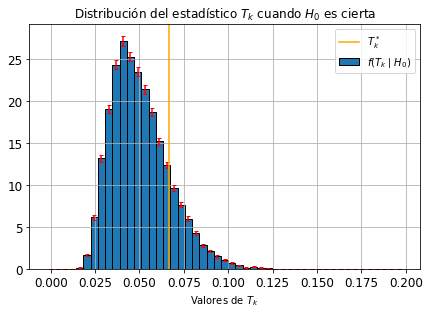

In [17]:
plt.figure(figsize=(7,4.5))

N = len(t)
hist, _ = np.histogram(t, bins=np.linspace(0,0.2,50), density=True)
bins1=np.linspace(0,0.2,50)
normed1 = N*(bins1[1]-bins1[0]) 
error =  np.sqrt(hist / normed1)
plt.bar(x=bins1[:-1], height=hist, width=np.diff(bins1), yerr=error, edgecolor='black', ecolor="red", capsize=2, label= r"$f(T_k \mid H_0)$")
plt.grid(True)
plt.axvline(0.06670,c="orange",label=r"$T_k^*$")
plt.title(r"Distribución del estadístico $T_k$ cuando $H_0$ es cierta")
plt.xlabel(r"Valores de $T_k$")
plt.legend(loc = 'best')
plt.tick_params(axis='both', labelsize="large")
plt.show()

Ahora calculo el p-valor a partir de esta simulación como $p-valor=P(T_k\geq T_k^*= 0.06670 \mid H_0)$. Para eso me defino una función que haga eso. 

In [19]:
def p_value(lista,valor,posicion):
    a=0
    if posicion=="mayor":
        for i in lista:
            if i>=valor:
                a+=1
    if posicion=="menor":
        for i in lista:
            if i<=valor:
                a+=1
    return a/len(lista)

In [20]:
p_value(t,0.06670,"mayor")

0.183

<div style="text-align: justify">
Para ver si el p-valor calculado de esta manera da muy mal, lo voy a comparar con el p-valor arrojado por la función de $scipy$: $kstest$ (la que usé para chequear el valor de $T_k^*$). 
</div>

In [21]:
sp.stats.kstest(mediciones,"randint", args=(1,2428510+1)) #args le pasa los límites de la uniforme teórica F(x)

KstestResult(statistic=0.06670269234159465, pvalue=0.2049238656997192)

<div style="text-align: justify"> Para nuestro valor de $T_k^*$, el p-valor=0.2049238656997192, calculado con $kstest$. Calculado con la simulación que realice obtuve un p-valor=0.183. Este valor no resulta estar muy alejado del arrojado por la función de $scipy$. Sin embargo, como respuesta al ejercicio voy a dar como p-valor el resultado arrojado por la función de $scipy$, que lo calculan más precisamente. Es decir, para mi resultado $T_k^*$=0.06670 el **p-valor =0.2049238656997192 $\sim$ 0.205**.</div>

<div style="text-align: justify">
 Por otro lado, por tabla el $x$ tal que $P(T_k>x \mid H_0)=\alpha=0.2$ se calcula como $x=\frac{1.07}{\sqrt{n}}$
donde n es el número de datos (Frodesen pág. 486). En nuestro caso n=251. Calculo x a continuación. </div>

In [126]:
x=1.07/(251**(0.5))
x

0.06753780113146494

<div style="text-align: justify"> Es decir que este valor de p-valor$\sim$0.205 para  $T_k^*$=0.06670 tiene sentido (no está tan mal calculado), ya que por tabla el valor de x tal que $P(T_k>x \mid H_0)=\alpha=0.2$ para n=251 es x=0.06753780113146494. Es decir: $x\sim T_k^*$ para un $\alpha\sim $p-valor.</div>

<div style="text-align: justify"> Ahora lo que falta decir es si con una significancia $\alpha = 0.05$ se puede rechazar la hipótesis nula $H_0$. Dado que el p-valor es más grande que $\alpha$, $0.205>0.050$, entonces con una significancia $\alpha = 0.05$ no puedo rechazar la hipótesis nula de que mis datos provienen de una uniforme en [1,2428510]. En particular, por definición el p-valor es la máxima significancia que le podemos pedir al test antes de rechazar $H_0$. Por lo que con cualquier significancia $\alpha<0.205$ acepto $H_0$, es decir que acepto la hipótesis de que mi muestra proviene de una $F(x)$ uniforme en la región antes mencionada. 
</div>

Finalmente, muestro la figura que pide el enunciado.

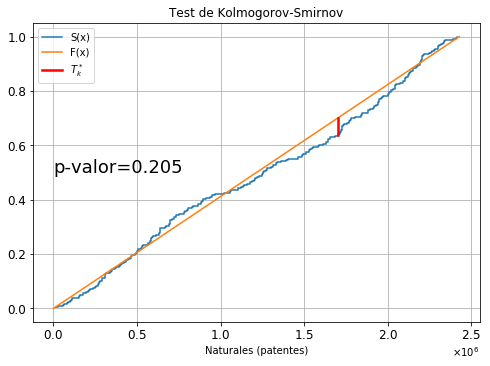

In [22]:
plt.figure(figsize=(8,5.5))

#S(x)
x=np.sort(mediciones)
S=np.arange(1,len(x)+1)/len(x)
# con la funcion step me asegure que grafique escalones
plt.step(x,S,where='post',  label = 'S(x)')

#F(x)
naturales=np.arange(1,2428510+1,1)
F=sp.stats.randint.cdf(naturales, 1, 2428510+1)
plt.step(naturales,F,where='post', label = 'F(x)')

#T_k*
plt.plot([1700366,1700366],[S_prima[1700366], F[1700366]], 'r',lw=2.5,label = r'$T_k^*$')

#p-valor
plt.text(0.5, 0.5, "p-valor=0.205",fontsize=18)

# Detalles del gráfico
plt.grid(True) 
plt.title('Test de Kolmogorov-Smirnov')
plt.xlabel('Naturales (patentes)')
plt.legend(loc = 'best') 
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0),useMathText=True)
plt.tick_params(axis='both', labelsize="large")
plt.show()

**2.** Considerá ahora, como hipótesis alternativa, que la distribución de patentes es
exponencial de parámetro $λ=4 × 10^{−7}$ y calculá la potencia del test del ítem anterior.

<div style="text-align: justify"> La potencia del test se define como la probabilidad de rechazar $H_0$ cuando $H_0$ es falsa, o equivalentemente es la probabilidad de aceptar $H_1$ cuando $H_1$ es verdadera. Entonces para calcular la potencia, necesito la distribución del estadístico $T_k$ pero cuando $H_1$ es cierta, es decir, $f(T_k \mid H_1)$. Matemáticamente calcular la potencia del test, es decir, calcular la probabilidad de aceptar $H_1$ cuando $H_1$ es verdadera, es equivalente a calcular:
$\hspace{1cm}$
$$Potencia=P(T_k>T_{critico}\mid H_1)=\int _{T_{critico}}^{T_{k}^{max}=1}f_{T_k}(t \mid H_1)dt$$

$\hspace{1cm}$

<div style="text-align: justify">
En otras palabras, integrar $f(T_k \mid H_1)$ en la zona donde rechazo $H_0$ (acepto $H_1$), es decir, en $T_k>T_{critico}$. </div>
$\hspace{1cm}$

<div style="text-align: justify">
Voy a calcular el $T_{critico}$ para nuestro caso, que es el de n=251 y $\alpha=0.05$. Por tabla el $T_{critico}$ tal que $P(T_k>T_{critico})=\alpha=0.05$ se calcula como $T_{critico}=\frac{1.36}{\sqrt{n}}$
donde n es el número de datos (Frodesen pág. 486). En nuestro caso n=251. Calculo $T_{critico}$ a continuación. </div>





In [23]:
T_c=1.36/(251**(0.5))
T_c

0.08584243882130124

<div style="text-align: justify"> Dicho esto, consigo  $f(T_k \mid H_1)$ a continuación mediante una simulación. Vale aclarar que a la hora de simular  $f(T_k \mid H_1)$, trunque la distribución exponencial en el valor 2428510, natural correspondiente a la patente AD592MF, la cual utilice como límite superior de la distribución uniforme teórica en el inciso anterior (esta patente era la más nueva vista por $Locos$ $por$ $patentes$ hasta el día del parcial). Es necesario truncar la exponencial en ese valor, ya que sino, al simular $f(T_k \mid H_1)$, tengo probabilidad no nula de generar patentes más nuevas que AD592MF. En particular, al usar el generador de números aleatorios de la exponencial puedo obtener un número asociado a una patente AZ000AA, la cual es mentira que está en circulación. 
</div>
$\hspace{1cm}$
<div style="text-align: justify"> Aclarado eso, simulo $f(T_k \mid H_1)$.</div>

In [24]:
def truncar(x):
    if x > 2428510:
        return False
    else:
        return True  

**Nota**: lo que sigue tarda un poco en correr.

In [25]:
lam=(4*(10**(-7)))**(-1) #lambda
t2=[]
for i in range(20000):
    efinal=[]
    e=sorted(sp.stats.expon.rvs(scale=lam, size=251))
    d=list(filter(truncar,e))
    for i in d:
        efinal.append(i)
    while len(efinal)<251:
        e2=sp.stats.expon.rvs(scale=lam, size=1)
        d3=list(filter(truncar,e2))
        if len(d3)!=0:
            for i in d3:
                efinal.append(i)
    efinal=sorted(efinal)
    y=np.arange(1,len(efinal)+1)/len(efinal)
    p=sp.stats.randint.cdf(efinal, 0, 2428510+1)
    t2.append(max(abs(y-p)))

Muestro el resultado de la simulación para $f(T_k \mid H_1)$ junto con la anteriormente simulada $f(T_k \mid H_0)$  y $T_{critico}$ para nuestro caso.

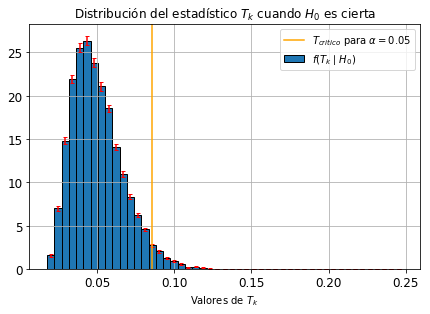

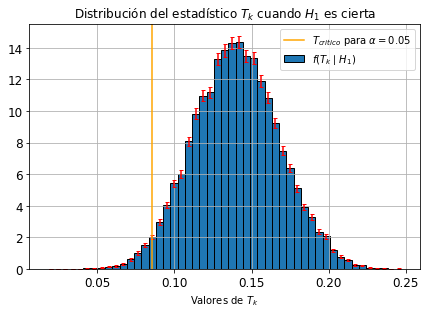

In [26]:
plt.figure(figsize=(7,4.5))

N = len(t)
hist, _ = np.histogram(t, bins=np.linspace(0.02,0.25,50), density=True)
bins1=np.linspace(0.02,0.25,50)
normed1 = N*(bins1[1]-bins1[0]) 
error =  np.sqrt(hist / normed1)
plt.bar(x=bins1[:-1], height=hist, width=np.diff(bins1), yerr=error, edgecolor='black', ecolor="red", capsize=2, label= r"$f(T_k \mid H_0)$")
plt.grid(True)
plt.axvline(0.08584243882130124,c="orange",label=r"$T_{critico}$ para $\alpha=0.05$")
plt.title(r"Distribución del estadístico $T_k$ cuando $H_0$ es cierta")
plt.xlabel(r"Valores de $T_k$")
plt.legend(loc = 'best')
plt.tick_params(axis='both', labelsize="large")
plt.show()

plt.figure(figsize=(7,4.5))

N2 = len(t2)
hist, _ = np.histogram(t2, bins=np.linspace(0.02,0.25,50), density=True)
bins2=np.linspace(0.02,0.25,50)
normed2 = N2*(bins2[1]-bins2[0]) 
error =  np.sqrt(hist / normed2)
plt.bar(x=bins2[:-1], height=hist, width=np.diff(bins2), yerr=error, edgecolor='black', ecolor="red", capsize=2, label= r"$f(T_k \mid H_1)$")
plt.grid(True)
plt.axvline(0.08584243882130124,c="orange",label=r"$T_{critico}$ para $\alpha=0.05$")
plt.title(r"Distribución del estadístico $T_k$ cuando $H_1$ es cierta")
plt.xlabel(r"Valores de $T_k$")
plt.legend(loc = 'best')
plt.tick_params(axis='both', labelsize="large")
plt.show()

Por todo lo anteriormente dicho, la potencia es igual a $P(T_k>T_{critico}\mid H_1)$, es decir, la integral desde el $T_{critico}$ hacia la $derecha$ del segundo plot. Entonces calculo eso.

In [27]:
a=0
T_c=0.08584243882130124
for i in t2: #simulaciones de T_k si H_1 es verdadera
    if i>=T_c:
        a+=1
potencia=a/len(t2) #numero de evento mayores o igual a T_c sobre el total de eventos simulados
potencia

0.9811

<div style="text-align: justify">
Respuesta: la potencia de este test es 0.9811. Cabe aclarar que el valor de la potencia depende fuertemente de la cantidad de patentes que cada uno haya registrado. Esto es así, porque el $T_{critico}$ depende explicitamente del n (número de datos), y cuanto menor es el n , mayor es el $T_{critico}$ (recuerdo que $T_{critico}=\frac{1.36}{\sqrt{n}}$ para $\alpha=0.05$). Esto quiere decir que a menor n, el $T_{critico}$ se corre a la derecha, por lo que la integral para calcular la potencia $P(T_k>T_{critico}\mid H_1)=\int _{T_{critico}}^{T_{k}^{max}=1}f_{T_k}(t \mid H_1)dt$ va a dar más chica. Es decir que alguien que haya tomado n=100 patentes, obtendrá una potencia del test menor que la mía que tome n=251 patentes. Mientras que alguien que haya tomado más de 251 patentes obtendrá una potencia mayor. </div>

**Nota**: este razonamiento lo pense para una cantidad de datos $n>80$, para los cuales, tanto $f(T_k \mid H_1)$ como $f(T_k \mid H_0)$ no dependen de n (Frodesen pág. 425). Por lo que a medida que aumento n, la distribución de $T_k$ no cambia, pero el $T_{critico}$ si disminuye, por lo que es esperable obtener mayor potencia a mayor cantidad de datos. 

### 4. La patente del auto más nuevo
$\hspace{1cm}$
<div style="text-align: justify">
Para motivar este ítem del parcial, podes leer sobre lo que en estadística se conoce como El
problema de los Tanques alemanes. Aquí, nos limitaremos a decir que, la distribución de
probabilidad de m (el natural correspondiente a la patente más nueva observada), puede
escribirse en función del número total de patentes nuevas observadas k y del número de
autos con patentes nuevas en circulación n, de la siguiente manera:</div>
$\hspace{1cm}$
$$P(m \mid k,n)=\frac{\binom{m-1}{k-1}}{\binom{n}{k}}$$

$\hspace{1cm}$
donde $k \leq m \leq n$.
<div style="text-align: justify">
**1.** Repetí N veces el experimento de generar k realizaciones de una variable aleatoria
con distribución uniforme en [0, n], y para cada experimento calculá el valor de m.
Presentá una figura con la distribución $P(m \mid k, n)$ así obtenida.</div>

Voy a repetir N=100000 veces el experimento de generar k=251 realizaciones con distribución uniforme discreta en [0, n], para dos n:
$n_1=2428510$ y $n_2=2600000$. 

In [28]:
m_1=[]
for i in range (100000):
    m_1.append(max(sp.stats.randint.rvs(0, 2428510+1,size=251)))

In [29]:
m_2=[]
for i in range (100000):
    m_2.append(max(sp.stats.randint.rvs(0, 2600000+1,size=251)))

Voy a escribir una función para $P(m \mid k,n)$. Si desarrollo los factoriales me queda:

$$P(m\mid k,n)=\frac{k!(m-1)!(n-k)!}{(k-1)!(m-k)!n!}=\frac{k(m-1)(m-2)....(m-(k-1))}{n(n-1)....(n-(k-1))}$$

Utilizo esta fórmula para calcular $P(m \mid k,n)$.

In [30]:
def p(m,k,n):
    coc=[]
    for i in range(1,k):
        coc.append((m-i)/(n-i))
    coc=np.array(coc)
    return (np.prod(coc)*k)/n

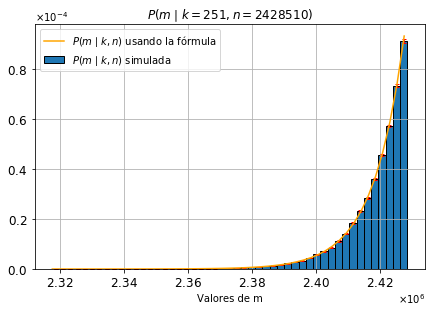

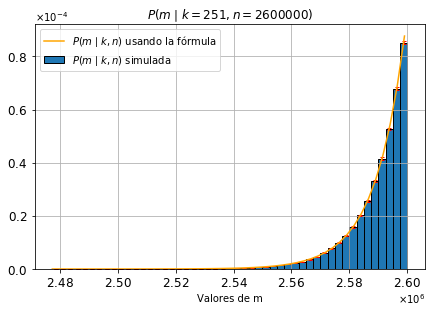

In [32]:
plt.figure(figsize=(7,4.5))

N2 = len(m_1)
hist, _ = np.histogram(m_1, bins=np.linspace(min(m_1),max(m_1),50), density=True)
bins2=np.linspace(min(m_1),max(m_1),50)
normed2 = N2*(bins2[1]-bins2[0]) 
error =  np.sqrt(hist / normed2)
plt.bar(x=bins2[:-1],align="edge", height=hist, width=np.diff(bins2), yerr=error, edgecolor='black', ecolor="red", capsize=2, label= r"$P(m \mid k,n)$ simulada")
plt.grid(True)
plt.title(r"$P(m \mid k=251,n=2428510)$")
plt.xlabel("Valores de m")
bins3=np.linspace(min(m_1),max(m_1)-1000,50)
squares = np.array([p(xi,251,2428510) for xi in bins3])
plt.plot(bins3,squares,"orange",label= r"$P(m \mid k,n)$ usando la fórmula")
plt.legend(loc = 'best')
plt.tick_params(axis='both', labelsize="large")
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0),useMathText=True)

plt.show()

plt.figure(figsize=(7,4.5))

N2 = len(m_2)
hist, _ = np.histogram(m_2, bins=np.linspace(min(m_2),max(m_2),50), density=True)
bins2=np.linspace(min(m_2),max(m_2),50)
normed2 = N2*(bins2[1]-bins2[0]) 
error =  np.sqrt(hist / normed2)
plt.bar(x=bins2[:-1],align="edge", height=hist, width=np.diff(bins2), yerr=error, edgecolor='black', ecolor="red", capsize=2, label= r"$P(m \mid k,n)$ simulada")
plt.grid(True)
plt.title(r"$P(m \mid k=251,n=2600000)$")
plt.xlabel("Valores de m")
bins3=np.linspace(min(m_2),max(m_2)-1000,50)
squares = np.array([p(xi,251,2600000) for xi in bins3])
plt.plot(bins3,squares,"orange",label= r"$P(m \mid k,n)$ usando la fórmula")
plt.legend(loc = 'best')
plt.tick_params(axis='both', labelsize="large")
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0),useMathText=True)
plt.show()

<div style="text-align: justify">Esta simulación sirve como chequeo de que efectivamente la fórmula $P(m \mid k, n)$ representa la distribución de
probabilidad de la variable aleatoria m (el natural correspondiente a la patente más nueva si observo k patentes) cuando las patentes provienen de una distribución uniforme en  [0, n]. </div>

$\hspace{1cm}$

<div style="text-align: justify">Como no mantuve el mismo eje x para ambos plots, no se observa, pero para n más grande (e igual k=251)  $P(m \mid k, n)$ se corre a la derecha. Para ver eso, ploteo ambas  $P(m \mid k, n)$  (calculadas con la fórmula) en el mismo gráfico. </div>

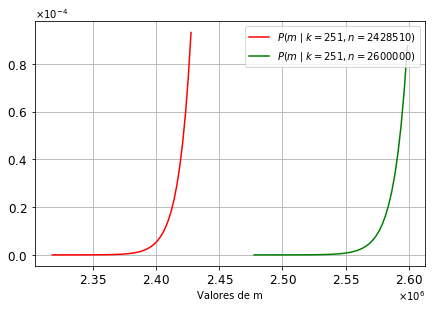

In [56]:
plt.figure(figsize=(7,4.5))
plt.grid(True)
plt.xlabel("Valores de m")
bins3=np.linspace(min(m_1),max(m_1)-1000,50)
squares = np.array([p(xi,251,2428510) for xi in bins3])
plt.plot(bins3,squares,"r",label= r"$P(m \mid k=251,n=2428510)$")
bins3=np.linspace(min(m_2),max(m_2)-1000,50)
squares = np.array([p(xi,251,2600000) for xi in bins3])
plt.plot(bins3,squares,"g",label= r"$P(m \mid k=251,n=2600000)$")
plt.legend(loc = 'best')
plt.tick_params(axis='both', labelsize="large")
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0),useMathText=True)

plt.show()

**2.** Sin hacer un cálculo analítico, sino usando la computadora e inferencia bayesiana
con un prior no informativo, encontrá la distribución $P(n \mid k, m)$.

Para eso, voy a utilizar la fórmula de Bayes:

$$P(n \mid k, m)=AP(m \mid k, n)\Pi (n)$$

$\hspace{1cm}$

donde A es una constante de normalización, $P(m \mid k, n)$ es la likelihood de mis mediciones, que en nuestro caso como mido una sola vez m, es directamente $P(m \mid k, n)$, la cual viene dada por la fórmula antes mencionada. Finalmente $\Pi (n)$ es el prior, que en este caso debe ser "no informativo", es decir:
$\hspace{1cm}$

$$\Pi (n)=\left\{\begin{matrix}
0 \hspace{1cm} n< m^*\\ 
1 \hspace{1cm} n\geq m^*
\end{matrix}\right. $$

donde voy a considerar que $m^*$ es el m medido, es decir, el natural asociado a la patente más nueva vista. En otras palabras, mi prior permite que n tome valores igual o mayores al $m^*$ observado con igual probabilidad, ya que es "no informativo". 

Lo que voy a hacer en este inciso es hacer una función general para calcular $P(n \mid k, m)$ para cualquier k y m. Luego en el inciso siguiente, evaluo en mi k y $m^*$.

In [34]:
def p(m,k,n):   #probabilidad de m
    coc=[]
    for i in range(1,k):
        coc.append((m-i)/(n-i))
    coc=np.array(coc)
    return (np.prod(coc)*k)/n

In [42]:
def posterior(k,m,nc):
    p_n_m=[]
    n=np.arange(m,nc+1,1)
    for i in n:
        p_n_m.append(p(m,k,i))
    A=sum(p_n_m) #normalizo
    p_n=np.array(p_n_m)
    p_n=p_n/A
    n_0=np.arange(1,m,1)
    ntot=np.append(n_0,n)
    p_0=np.array([0]*len(n_0))
    ptot=np.append(p_0,p_n)
    return ntot, ptot

<div style="text-align: justify"> El nc es un n de corte para el cual $P(m= \mid k, nc)$ ya es despreciable. Esto lo hago, ya que en rigor el n podría ir hasta el natural asociado a la patente ZZ999ZZ (456976000). Por ejemplo, si para calcular el posterior uso m= 2412985 y k=251, ya para n=2600000 $P(m=2412985 \mid k=251, n=2600000)$ es despreciable, por lo que no vale la pena calcular el resto de los  $P(m=2412985 \mid k=251, n)$ para n's más grandes.</div>

Chequeo que $P(m=2412985 \mid k=251, n=2600000)$ sea despreciable.

In [36]:
p(2412985,251,2600000)

7.579014211693339e-13

**3.** Ahora que tenés una distribución para n, usando tus valores observados en la calle
para k y m, decinos cual es tu estimación bayesiana para n. 

Lo que hago ahora es aplicar la función $posterior$ con mis valores de k y m. Mi k es 251, pues es el número de patentes observadas. Mi m es $m^*$= 2412985, es decir, el máximo entre los naturales asociados a las patentes observadas por mí. Voy a tomar como nc=2600000, ya que acabo de demostrar que para ese nc  $P(m= \mid k, nc)$ es despreciable.

In [43]:
n,p_n=posterior(251,2412985,2600000)
# me devulve la tira de n y la p(n) para cada n bien normalizado

Voy a graficar el posterior obtenido con mis k y $m^*$, es decir, $P(n \mid k=251,m=2412985)$.

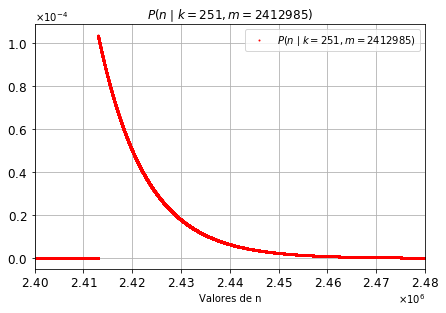

In [57]:
plt.figure(figsize=(7,4.5))
plt.plot(n,p_n,"ro",markersize=1,label=r"$P(n \mid k=251,m=2412985)$")
plt.xlim((2400000, 2480000)) 
plt.ticklabel_format(style='sci', axis='Both', scilimits=(0,0),useMathText=True)
plt.grid(True)
plt.xlabel("Valores de n")
plt.legend(loc = 'best')
plt.tick_params(axis='both', labelsize="large")
plt.title(r"$P(n \mid k=251,m=2412985)$")
plt.show()

Vale aclarar que $P(n \mid k=251,m=2412985)$ está graficada con puntos, ya que en rigor, la distribución para n es discreta. Sin embargo, por la cantidad de puntos no se llegan a distinguir los puntos.Y que para todo $n<m^*=2412985$, $P(n\mid k=251,m=2412985)=0$ (aunque no se muestren en el plot).

Ahora calculo el estimador bayesiano de n, es decir, la esperanza del posterior. Esto lo calculo como la sumatoria de cada valor de n por su probabilidad, es decir:

$$E(n)=\sum _{n}nP(n\mid k,m)$$

In [52]:
e=sum((n*p_n))
e

2422674.6973212245

El estimador bayesiano para n con este posterior es $n \sim 2422675$. En principio este tiene sentido ya que es más grande que mi $m^*=2412985$ medido.

Ahora puedo calcular la desviación estándar de n a partir de $P(n\mid k=251,m=2412985)$ como:


$$Var(n)=\sum _{n}(n-E(n))^{2}P(n\mid k,m)  \hspace{1cm} \rightarrow \hspace{1cm} \sigma(n)=\sqrt{\sum _{n}(n-E(n))^{2}P(n\mid k,m)}$$


In [58]:
sigma_n=(sum(((n-2422675)**2)*p_n))**(1/2)
sigma_n

8962.581627788919

La estimación bayesiana de mi n es $n=(2422675 \pm 8963)$. Si consideramos que "el valor real de n" al día del examen era el natural asociado a AD592MF (2428510), el intervalo bayesiano con la receta $E(n)\pm \sqrt{Var(n)}$ contiene al valor real de n.

**4.** Si consideramos que al momento de este examen la patente más nueva en circulación es AD592MF, calculá cuanta suerte tuviste el día que armaste tu lista. Es decir, ¿cuál es la probabilidad de que hagas lo mismo y obtengas una estimación igual o
peor que la obtenida para la patente más nueva en circulación.

La estimación de n depende fuertemente de la patente más nueva observada $m^*$. Esto se debe a que nuestro prior $\Pi (n)$ está determinado por el  $m^*$ medido. Por lo tanto, para un $m^*$ medido más grande espero una mejor estimación de n, mientras que si mido un  $m^*$ más chico, obtendré una peor estimación de n. En este ítem, nos dicen que consideremos a n como el natural asociado a la patente AD592MF, es decir, $n=2428510$. Mi pregunta es qué pasa si justo hubiese medido $m^*=n=2428510$. La estimación de n en ese caso, ¿Es mejor o peor que la que obtuvimos con  $m^*=2412985$? 


In [70]:
def posterior(k,m,nc):
    p_n_m=[]
    n=np.arange(m,nc+1,10)
    for i in n:
        p_n_m.append(p(m,k,i))
    A=sum(p_n_m) #normalizo
    p_n=np.array(p_n_m)
    p_n=p_n/A
    return n, p_n

Lo que voy a hacer es barrer el m desde el que medi hasta m=n y fijarme para cuáles obtengo una mejor estimación de n que tomando $m^*=2412985$ (el que medi). Luego el p-valor va a ser la suma de las probabilidades de los m para los cuales se obtiene una estimación de n igual o peor que con $m^*=2412985$.

In [117]:
e=[]
m=np.arange(2412985,2428510,1000)
for i in m:
    n_prima,p_n_prima=posterior(251,i,2460000)
    e.append(sum((n_prima*p_n_prima)))

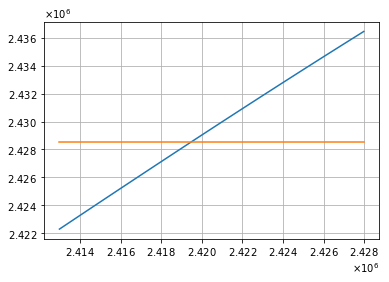

In [126]:
plt.plot(m,e)
plt.plot(m,[2428510]*len(e),label="E(n)")
plt.ticklabel_format(style='sci', axis='Both', scilimits=(0,0),useMathText=True)
plt.grid(True)
plt.show()

Como vemos, desde cierto $m>m^*$ empiezo a obtener una estimación peor para n que con nuestro $m^*=2412985$. Voy a ver cuales son esos ms. Después, el p-valor es la probabilidad de obtener esos ms (aparte de los $m<m^*$ para los cuales tambien obtengo una peor estimacion de n, lo que se ve de la relacion lineal entre m y E(n)).

In [129]:
dist=2428510- 2422675
m_pva=[]
for i in range(len(e)):
    if abs(e[i]-2428510)>=dist:
        m_pva.append(m[i])


In [130]:
def p(m,k,n):   #probabilidad de m
    coc=[]
    for i in range(1,k):
        coc.append((m-i)/(n-i))
    coc=np.array(coc)
    return (np.prod(coc)*k)/n

In [131]:
pvalore=[]
for i in m_pva:
    pvalore.append(p(i,251,2428510))

In [132]:
sum(pvalore)

0.00028673328552709877

Al final la probabilidad de esos $m>m^*$ era casi despreciable. Ahora lo que hago entonces es calcular como p-valor la probabilidad de obtener $m<m^*$, para los cuales obtengo una peor estimación de n (se ve en el gráfico anterior que la relación es lineal entre m y la esperanza de n). Es decir

$$p-valor=P(251\leq m \leq m^*=  2412985 \mid k= 251,n=2428510)=\sum _{m=k=251}^{m=m^*= 2412985 }P(m \mid k=251,n=2428510)=\sum _{m=k=251}^{m=m^*= 2412985 }\frac{\binom{m-1}{251-1}}{\binom{2428510}{251}}$$ 

Eso es lo mismo que el resultado del ejercicio7, por lo que p-valor=0.14 (ver ejercicio 7).

### 5. ¿Independiente del barrio?
En este punto debes compartir tu muestra con otro estudiante de la materia. De este
intercambio ambos tendrán dos muestras. Es importante que elijas para el intercambio a
alguien que haya tomado los datos en un barrio distinto al tuyo, cuanto más alejado esté
mejor.

Importo la segunda muestra de patentes, tomadas en San Martín, Provincia de Buenos Aires, las cuales me fueron compartidas por Alexis Luszczak. Elegi ésta, ya que es la muestra tomada más alejada de Caballito que encontre.

In [74]:
mediciones2=patentes_a_naturales("san_martin.txt")
mediciones2=list(set(mediciones2)) #elimino patentes repetidas dentro de la muestra 2

In [75]:
len(mediciones2)

198

Voy a llamar muestra 1 a mi muestra (tomada en Caballito) y muestra 2 a la de Alexis (tomada en San Martín). Chequeo si hay patentes repetidas entre la muestra 1 y 2.

In [76]:
for i in mediciones:
    if (i in mediciones2)==True:
        print("repetida")

**1.** Aplicá el test de Wilcoxon para testear si ambas muestras provienen de poblaciones
con la misma esperanza y calculá el p-valor ($p_w$)

$\hspace{1cm}$
<div style="text-align: justify">
El test de Wilcoxon lo que propone es lo siguiente. Se tienen dos muestras  $x_1,x_2,.....,x_n$ e $y_1,y_2,.....,y_m$ con $n\leq m$. Se quiere testear la hipótesis nula $H_0$ de que ambas muestras provienen de la misma población. Para eso, se ordena las (n+m) observaciones de menor a mayor. En esta muestra combinada y ordenada, se le asigna un rango a cada observación, desde 1 para la menor de las (n+m) observaciones, hasta rango=n+m para la observación con valor más grande de todas. El estadístico del test de  Wilcoxon ($W$) se construye sumando los n rangos de las observaciones de la muestra x. Si $H_0$ es verdadera, se espera que las observaciones de x e y estén bien mezcladas, y por lo tanto el valor de $W$ no debería ser ni tan chico ni tan grande. Es por eso que se toma el test $a$ $dos$ $colas$ (two-sided) para testear  $H_0$. </div>
$\hspace{1cm}$
<div style="text-align: justify">
Teniendo eso en cuenta se definen:
</div>
$$\bar{W}=\frac{n}{2}(n+m+1)$$
$$Var(W)=\frac{nm}{12}(n+m+1)$$
$\hspace{1cm}$

<div style="text-align: justify">
Cabe aclarar que para $n,m>10$ ya vale la aproximación gaussiana para la distribución del $W$ cuando $H_0$ es cierta ($f(W \mid H_0)$). En nuestro caso, n=198 y m=251, por lo que vale la aproximación gaussiana (referencia: Frodesen pág. 451). 
</div>
$\hspace{1cm}$

In [77]:
#chequeo los valores de n y m 
n=len(mediciones2)
m=len(mediciones)
print([n,m])

[198, 251]


Ahora, armo un diccionario para saber de cuál muestra (1 ó 2) proviene cada patente.

In [78]:
d=dict()
for i in mediciones:
    d[i]="a"
for i in mediciones2:
    d[i]="b"

Junto las dos muestras en una sola lista y la ordeno de mayor a menor.

In [79]:
total=[]
for i in mediciones:
    total.append(i)
for i in mediciones2:
    total.append(i)
    
total=sorted(total)

Defino la lista $rank$ que tiene los rangos desde 1 hasta el número total de patentes (n+m). Luego sumo los rangos pertenecientes a la muestra que tiene menos elementos, en este caso, sumo los rangos para los elementos de la muestra 2 (San Martín). 

In [80]:
rank=np.arange(1,len(total)+1,1)
rangos=[]
for i in range(len(total)):
    if d[total[i]]=="b":
        rangos.append(rank[i])
w=sum(rangos) 
w

42516

La realización del estadístico $W$ en mis datos fue $W^*=42516$. Ahora, falta calcular el p-valor ($p_w$). Para eso voy a usar la aproximación gaussiana válida en nuestro caso (n,m>10) para $f(W \mid H_0)$. Necesito calcular, entonces, $\bar{W}$ y $Var(W)$. 

In [81]:
n=len(mediciones2)
m=len(mediciones)

In [82]:
w_prom=(n/2)*(n+m+1)
w_prom

44550.0

In [83]:
v=(n*m/12)*(n+m+1)
v

1863675.0

 <div style="text-align: justify"> Como $W^*<W_{prom}$, voy a usar para el p-valor la cola inferior. Sin embargo, eso va a ser la mitad del p-valor, ya que medir un $W$ relativamente muy chico es igual de malo que medir un $W$ relativamente muy grande cuando mi $H_0$ es que ambas muestras provienen de la misma población, como se mencionó anteriormente. En concreto, en este caso el p-valor se calcula como:
$$p_w=2\int_{-\infty}^{W^*}f(W \mid H_0) \sim 2\int_{-\infty}^{W^*} N(\mu =\bar{W},\sigma =\sqrt{Var(W)})$$
 
 </div>

In [84]:
p_valor=2*sp.stats.norm.cdf((w-w_prom)/(v**(1/2)))
p_valor

0.13624264787281484

La respuesta a este inciso es $p_w=0.13624264787281484 \sim 0.14$. Esto es equivalente a decir que la máxima significancia del test $W$ antes de rechazar $H_0$ (ambas muestras de patentes provienen de la misma población) es $\alpha \sim 0.14$.

Ahora veo si mis valores de $W^*$ y $p_w$ son consistentes con los arrojados por el test de Wilcoxon de scipy. Para eso, calculo el valor de $W^*$ pasado a la Normal (0,1):

In [85]:
(w-w_prom)/(v**(1/2))

-1.4899299794675067

In [86]:
sp.stats.ranksums(mediciones,mediciones2)

RanksumsResult(statistic=1.4899299794675067, pvalue=0.13624264787281484)

Efectivamente los valores de $W^*$ y $p_w$ arrojados por la función de $scipy$ son iguales a los obtenidos hasta el último decimal, por lo que no hice las cosas tan mal.

<div style="text-align: justify">
**2.** Ahora nos gustaría que apliques el estadístico propuesto en el **problema 4 de la guía
de Test de Hipótesis**. Pero antes, notá que no es correcto usar que tiene distribución
t-student. ¿Por qué? Tomando como hipótesis nula que la distribución de patentes
es uniforme, encontrá computacionalmente la distribución del estadístico propuesto. </div>


<div style="text-align: justify"> Recuerdo el estadístico propuesto por el **problema 4 de la guía de Test de Hipótesis**. </div>
$\hspace{1cm}$

<div style="text-align: justify"> Considere dos muestras independientes $X_{1},.....,X_{n}$ e $Y_{1},.....,Y_{m}$. Se quiere testear la hipótesis nula $H_{0}$ de que las dos provienen de una misma distribución , mientras que la hipótesis alternativa $H_{1}$ es que no provienen de una misma distribución. Considero el siguiente estadístico.  </div>


$$U=\left ( \bar{X}-\bar{Y} \right )\sqrt{\frac{m+n-2}{(\frac{1}{m}+\frac{1}{n})(s^{2}_{X}+s^{2}_{Y})}}$$

<div style="text-align: justify"> Con $s^{2}_{X}=\sum ^{n}_{i}(X_i-\bar{X})^{2}$ y $s^{2}_{Y}=\sum ^{m}_{i}(Y_i-\bar{Y})^{2}$</div>

<div style="text-align: justify"> En nuestro caso, las muestras $X$ e $Y$ son las dos muestras de patentes de Caballito y de San Martín. La hipótesis nula $H_0$, como dice el enunciado del **problema 4 de la guía de Test de Hipótesis** es que las dos muestras $X$ e $Y$ provienen de la misma distribución, que en nuestro caso es una uniforme en [1,2428510], donde el límite superior de la uniforme es el natural que le corresponde a la patente AD592MF, la cual se considera la patente más nueva en circulación al momento de este parcial (dato de enunciado). Efectivamente esta patente es más nueva que todas las patentes encontradas por mí y por Alexis. </div>
$\hspace{1cm}$
<div style="text-align: justify">
En este caso la distribución de $U$ no es t-student porque acá la hipótesis nula $H_0$ ya no es que $X$ e $Y$ provienen de la misma distribución gaussiana. Como $H_0$ ahora es que $X$ e $Y$ provienen de la misma uniforme, la distribución de U cuando $H_0$ es cierta no es más una t-student. Entonces, lo que voy a hacer ahora es encontrar la distribución de U cuando $H_0$ es verdadera, es decir, $f(U \mid H_0)$</div>

In [98]:
u=[]
for i in range(10000):
    x=sp.stats.randint.rvs(0, 2428510+1,size=len(mediciones))
    y=sp.stats.randint.rvs(0, 2428510+1,size=len(mediciones2))
    m=len(y)
    n=len(x)
    sx=sum((x-np.mean(x))**2)
    sy=sum((y-np.mean(y))**2)
    u.append((np.mean(x)-np.mean(y))*((m+n-2)/((1/m +1/n)*(sx+sy)))**(1/2))

Grafico la $f(U \mid H_0)$ encontrada mediante la simulación previa.

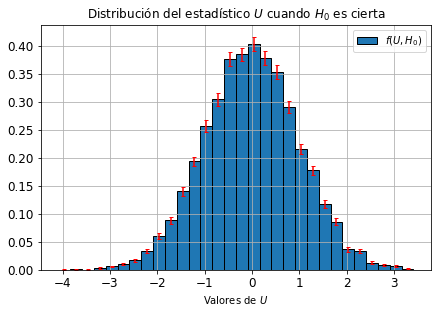

In [90]:
plt.figure(figsize=(7,4.5))

N = len(u)
hist, _ = np.histogram(u, bins=np.arange(min(u),max(u),0.25), density=True)
binss=np.arange(min(u),max(u),0.25)
normed = N*(binss[1]-binss[0])
error =  np.sqrt(hist / normed)
plt.bar(x=binss[:-1],align="edge", height=hist, width=np.diff(binss), yerr=error, edgecolor='black', ecolor="red", capsize=2, label= r"$f(U,H_0)$")
plt.grid(True)
plt.title(r"Distribución del estadístico $U$ cuando $H_0$ es cierta")
plt.xlabel(r"Valores de $U$")
plt.legend(loc = 'best')
plt.tick_params(axis='both', labelsize="large")
plt.show()




Como la distribución $f(U \mid H_0)$ tiene mucha $pinta$ de una Normal(0,1), voy a graficarle dicha distribución encima.

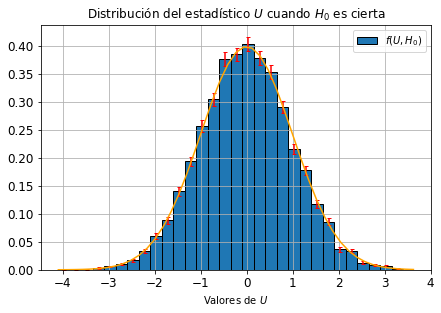

In [91]:
plt.figure(figsize=(7,4.5))

N = len(u)
hist, _ = np.histogram(u, bins=np.arange(min(u),max(u),0.25), density=True)
binss=np.arange(min(u),max(u),0.25)
normed = N*(binss[1]-binss[0])
error =  np.sqrt(hist / normed)
plt.bar(x=binss[:-1],align="edge", height=hist, width=np.diff(binss), yerr=error, edgecolor='black', ecolor="red", capsize=2, label= r"$f(U,H_0)$")
plt.grid(True)
plt.title(r"Distribución del estadístico $U$ cuando $H_0$ es cierta")
plt.xlabel(r"Valores de $U$")
plt.legend(loc = 'best')
plt.tick_params(axis='both', labelsize="large")
bins2=np.linspace(min(u),max(u),45)
p=sp.stats.norm.pdf(bins2)
plt.plot(bins2,p,"orange")
plt.show()

Tiene sentido que $f(U \mid H_0)$ tenga forma de una Normal(0,1), ya que el test $U$ es una de las muchas formas del test $t$, para el cual para nuestros valores de n=251  y m=198 ya vale la aproximación gaussiana. Además, tiene sentido que tieda a una gaussiana con esperanza nula, ya que estoy construyendo  $f(U \mid H_0)$ bajo la hipótesis de que $X$ e $Y$ provienen de la misma distribución. 

**3.** Aplicá sobre tus observaciones el test construido en el ítem anterior (ahora que si
conoces la distribución de su estadístico) y calculá el p-valor ($p_t$).


Voy a calcular el valor de mi estadístico en mis datos, es decir, $U^*$.

In [87]:
m=len(mediciones)
n=len(mediciones2)
sx=sum((mediciones-np.mean(mediciones))**2)
sy=sum((mediciones2-np.mean(mediciones2))**2)
u_med=(np.mean(mediciones)-np.mean(mediciones2))*((m+n-2)/((1/m +1/n)*(sx+sy)))**(1/2)
u_med

1.4699651750545393

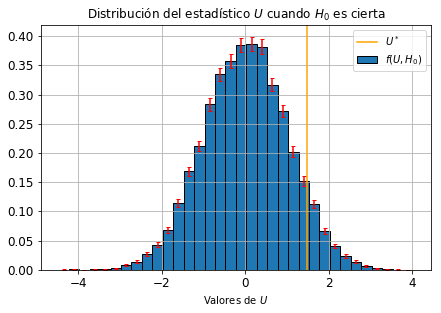

In [99]:
plt.figure(figsize=(7,4.5))

N = len(u)
hist, _ = np.histogram(u, bins=np.arange(min(u),max(u),0.25), density=True)
binss=np.arange(min(u),max(u),0.25)
normed = N*(binss[1]-binss[0])
error =  np.sqrt(hist / normed)
plt.bar(x=binss[:-1],align="edge", height=hist, width=np.diff(binss), yerr=error, edgecolor='black', ecolor="red", capsize=2, label= r"$f(U,H_0)$")
plt.grid(True)
plt.axvline(1.4699651750545393,c="orange",label=r"$U^*$")
plt.title(r"Distribución del estadístico $U$ cuando $H_0$ es cierta")
plt.xlabel(r"Valores de $U$")
plt.legend(loc = 'best')
plt.tick_params(axis='both', labelsize="large")
plt.show()

<div style="text-align: justify">
El $U^*$ es 1.4699651750545393. Ahora me falta calcular el p-valor $p_t$. Para eso, vale aclarar que el test $U$ es $a$ $dos$ $colas$. Esto se puede ver de la forma que tiene el estadístico. El signo de $U$ lo da $(\bar{X}-\bar{Y})$. Como la hipótesis nula $H_0$ es que las muestras $X$ e $Y$ provienen de la misma distribución,  entonces medir algo peor que lo que medi ($U^*$), es medir un $U$ positivo más grande que $U^*$ o medir un $U$ negativo más grande que $U^*$. Dicho eso, calculo el p-valor a partir de $f(U \mid H_0)$ simulada con la función antes definida.</div>

In [ ]:
#def p_value(lista,valor,posicion):
 #   a=0
  #  if posicion=="mayor":
   #     for i in lista:
    #        if i>=valor:
     #           a+=1
    #if posicion=="menor":
    #    for i in lista:
     #       if i<=valor:
      #          a+=1
    #return a/len(lista)

In [92]:
p_t=2*p_value(u,1.4699651750545393,"mayor")
p_t

0.1342

El p-valor usando los datos de mi simulación de $f(U \mid H_0)$ da $p_t=$0.1342. Ahora voy a calcular de nuevo $p_t$ usando la aproximación de que $f(U \mid H_0)\sim N(0,1)$ por lo que vimos antes.

$$p_t=2\int_{U^*}^{\infty}f(U \mid H_0) \sim 2\int_{U^*}^{\infty} N(\mu =0,\sigma =1)$$

In [93]:
#Usando la aproximacion gaussiana 
p_t_prima=2*sp.stats.norm.sf(1.4699651750545393)
p_t_prima

0.14157118607801158

El $p_t$ calculado con la aproximación $f(U \mid H_0)\sim N(0,1)$ no da muy alejado del $p_t$ obtenido usando la simulación de $f(U \mid H_0)$, por lo que esa aproximación no estaba tan mal. 

### 6. Combinando los tests
$\hspace{1cm}$
<div style="text-align: justify">
Una posible forma de combinar los p-valores obtenidos en los dos test aplicados en el
punto anterior ($p_w$ y $p_t$) es a través del estadístico $T = -2 log(p_w · p_t)$. </div>
$\hspace{1cm}$
<div style="text-align: justify">
**1.** Si los test fueran independientes, ¿que distribución esperás para T? </div>



Me piden ver cuál es la distribución que espero para T cuando $H_0$ es cierta y los test son independientes. Para eso, primero veo un caso de cambio de variables más simple que es el siguiente. Si $X\sim Unif[0,1]$, ¿$Y=-2log(X)$ que distribución tiene?. Hago a continuación la cuenta de cambio de variables.
$\hspace{1cm}$
$$\begin{split}
F_{Y}(t) & = P(y\leq t ) \\
 & = P(-2log(x)\leq t) \\
  & = P(ln(x)\geq \frac{-t}{2})\\
  & = P(x\geq e^{\frac{-t}{2}})\\
  & = 1-F_{x}(x=e^{\frac{-t}{2}})
\end{split}$$
$\hspace{1cm}$
$\hspace{1cm}$


$\rightarrow$  $\hspace{1cm}$ $f_{Y}(t)=\frac{\mathrm{d} }{\mathrm{d} t}F_{Y}(t)=\frac{\mathrm{d} }{\mathrm{d} t}(1-F_{x}(x=e^{\frac{-t}{2}}) )=-f_{X}(x=e^{\frac{-t}{2}})e^{\frac{-t}{2}}\frac{-1}{2}=\frac{1}{2}e^{\frac{-t}{2}}=\chi ^{2}_{\nu=2 }$

Es decir que si $X\sim Unif[0,1]$, entonces $Y=-2log(X)\sim \chi ^{2}_{\nu=2 } $ (chi cuadrado de 2 grados de libertad)
Por lo tanto, si tengo 2 p-valores $p_t$ y $p_w$ de diferentes estudios (y por lo tanto independientes), entonces:

$$T = -2 log(p_w · p_t)=-2 log(p_w)-2 log(p_t)\sim \chi ^{2}_{\nu=2 }+\chi ^{2}_{\nu=2 }\sim \chi ^{2}_{\nu=4 }$$

pues suma de chi cuadrados de n y m grados de libertad, es una chi cuadrado de n+m grados de libertad.


En conclusión, si los test fueran independientes, la distribución que espero para $T = -2 log(p_w · p_t)$ es $\chi ^{2}_{\nu=4 }$, es decir, una chi cuadrado de 4 grados de libertad. Vale aclarar que esta es la distribución de T si la hipótesis nula es cierta, sino no vale que $p_w,p_t\sim Unif[0,1]$. En conclusión, si los test son independientes:

$$f(T \mid H_0) \sim \chi ^{2}_{\nu=4 }$$

<div style="text-align: justify">
**2.** Estudiá que distribución tiene T si se construye con los p-valores dados por los dos
test aplicados en el ítem anterior cuando las muestras provienen de poblaciones con
la misma esperanza (es decir, cuando la hipótesis nula es verdadera). Usalo para
calcular un nuevo p-valor que combine los resultados de ambos test ya aplicados. </div>

Lo que voy a hacer es simular $f(T \mid H_0)$ con $T = -2 log(p_w · p_t)$, donde $p_w$ es el p-valor del test de Wilcoxon y $p_t$ es el del test de $U$. Vale aclarar que estos test comparten la misma hipótesis nula $H_0$ de que las dos muestras (1 y 2, de Caballito y San Martín, respectivamente) provienen de una misma población, es decir, de una misma distribución. Sin embargo, los test $W$ y $U$ no son independientes, ya que se basan en el mismo experimento, es decir, toman para el test los mismos datos. En otras palabras, son dos tests distintos con igual $H_0$ para la misma tira de datos. Por lo tanto, no son independientes, están correlacionados al usar como input los mismos datos. Es por eso que para el estadístico T no espero, en nuestro caso, una distribución chi cuadrado de 4 grados de libertad. Entonces,para obtener $f(T \mid H_0)$ voy a simularla.

In [94]:
pu=[]
pw=[]
m=len(mediciones)
n=len(mediciones2)
rank=np.arange(1,449+1,1)
v=(n*m/12)*(n+m+1)
w_prom=(n/2)*(n+m+1)
for i in range(10000):
    x=sp.stats.randint.rvs(1, 2428510+1,size=len(mediciones2))
    y=sp.stats.randint.rvs(1,  2428510+1,size=len(mediciones))
    sx=sum((x-np.mean(x))**2)
    sy=sum((y-np.mean(y))**2)
    u=(np.mean(x)-np.mean(y))*((m+n-2)/((1/m +1/n)*(sx+sy)))**(1/2)
    if u>0:
        pu.append(2*sp.stats.norm.sf(u))
    if u<0:
        pu.append(2*sp.stats.norm.cdf(u))
    d=dict()
    for i in y:
        d[i]="a"
    for i in x:
        d[i]="b"
    total=np.sort(np.append(x,y))
    rangos=[]
    for i in range(len(total)):
        if d[total[i]]=="b":
            rangos.append(rank[i]+1)
    w=(sum(rangos)-w_prom)/(v**(1/2))
    if w>=0:
        pw.append(2*sp.stats.norm.sf(w))
    if w<0:
        pw.append(2*sp.stats.norm.cdf(w))
        

In [95]:
T=[]
for i in range (len(pu)):
    T.append(-2*np.log(pu[i]*pw[i]))

Muestro con un histograma la distribución simulada $f(T \mid H_0)$. Además voy a plotear una distribución chi cuadrado de 4 grados de libertad, la cual sería la distribución de T si los test fuesen independientes (además de $H_0$ verdadera).

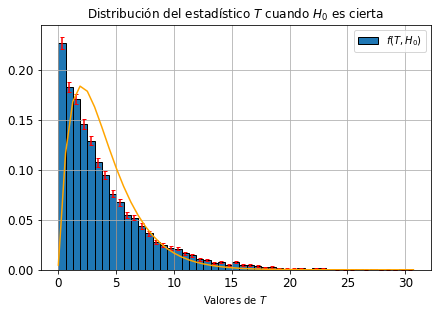

In [261]:
plt.figure(figsize=(7,4.5))

N = len(T)
hist, _ = np.histogram(T, bins=np.linspace(min(T),max(T),50), density=True)
binss=np.linspace(min(T),max(T),50)
normed = N*(binss[1]-binss[0])
error =  np.sqrt(hist / normed)
plt.bar(x=binss[:-1],align="edge", height=hist, width=np.diff(binss), yerr=error, edgecolor='black', ecolor="red", capsize=2, label= r"$f(T,H_0)$")
plt.grid(True)
plt.title(r"Distribución del estadístico $T$ cuando $H_0$ es cierta")
plt.xlabel(r"Valores de $T$")
plt.legend(loc = 'best')
plt.tick_params(axis='both', labelsize="large")
p=sp.stats.chi2.pdf(binss,4)
plt.plot(binss,p,"orange")
plt.show()

Claramente la distribución de $f(T \mid H_0)$ no es una chi cuadrado de 4 grados de libertad, que es lo que esperabamos, ya que los test $U$ y $W$ no son independientes. Voy a calcular mi $T^*$ con mis datos.

In [105]:
p_w=0.13624264787281484
p_t=0.1342
t_med=-2*np.log(p_w*p_t)
t_med

8.003483723811518

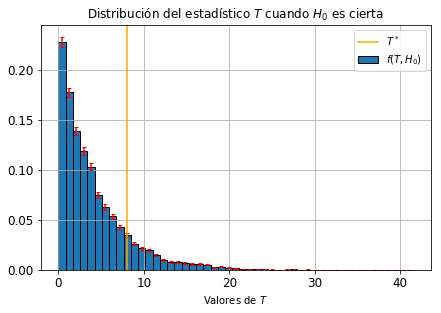

In [106]:
plt.figure(figsize=(7,4.5))

N = len(T)
hist, _ = np.histogram(T, bins=np.linspace(min(T),max(T),50), density=True)
binss=np.linspace(min(T),max(T),50)
normed = N*(binss[1]-binss[0])
error =  np.sqrt(hist / normed)
plt.bar(x=binss[:-1],align="edge", height=hist, width=np.diff(binss), yerr=error, edgecolor='black', ecolor="red", capsize=2, label= r"$f(T,H_0)$")
plt.axvline(t_med,c="orange",label=r"$T^*$")
plt.grid(True)
plt.title(r"Distribución del estadístico $T$ cuando $H_0$ es cierta")
plt.xlabel(r"Valores de $T$")
plt.legend(loc = 'best')
plt.tick_params(axis='both', labelsize="large")
plt.show()

Ahora lo que falta hacer es calcular el p-valor para mi $T^*$=7.924583792230138 $\sim$ 7.92, es decir, voy a calcular un nuevo p-valor que combine los resultados de ambos test ($W$ y $U$) ya aplicados. Acá medir algo peor es medir un $T$ más grande, ya que eso implica que los p-valores $p_t$ y $p_w$ son más chicos. Para calcularlo uso la funcion p-value, antes definida.

In [107]:
p_value(T,t_med,"mayor")

0.1402

El nuevo p-valor que combina los resultados de ambos test ($W$ y $U$) ya aplicados resultó $p_{comb}=0.1402$.

### 7. Sé tu propio verdugo
$\hspace{1cm}$

<div style="text-align: justify">
Aunque muy pero muy poco probable, cabe la posibilidad de que alguno de ustedes decidiera inventar la lista de patentes y como no podía ser de otra manera, pensamos aplicar un test de hipótesis para testearlo. El test que decidimos usar tendrá al valor de
m que informaste como estadístico y su distribución será la dada por la ecuación: </div>
$$P(m;k,n)=\frac{\binom{m-1}{k-1}}{\binom{n}{k}}$$
$\hspace{1cm}$
<div style="text-align: justify">
Tomaremos para n el natural correspondiente a la patente AD592MF, y para k, el número de patentes que hayas dicho que observaste. Con eso sabremos cuan probable es que hayas observado lo que decís haber observado o algo más raro. </div>
$\hspace{1cm}$
<div style="text-align: justify">
La buena noticia, es que te damos a vos la oportunidad de elegir la máxima significancia de nuestro test. Es decir, queremos que nos indiques el máximo (o mínimo) valor de $\alpha$ antes de que debamos aceptar la hipótesis de que inventaste tus datos.</div>

En primer lugar, voy a calcular el natural correspondiente a la patente AD592MF, es decir, el n.

In [108]:
n=patente_a_natural("AD592MF")
n

2428510

Recuerdo el valor de $m^*$, es decir, el natural asociado a la patente más nueva que observé.

In [109]:
m=max(mediciones)
m

2412985

<div style="text-align: justify">
El test propuesto tiene como estadístico a m, es decir, el natural correspondiente a la patente más nueva observada (el máximo de los naturales asociados a mis patentes). La hipótesis nula es $H_0$: no invente los datos. La distribución de m cuando $H_0$ es cierta está dada por: </div>
$\hspace{1cm}$
$$P(m \mid k,n)=\frac{\binom{m-1}{k-1}}{\binom{n}{k}}$$
$\hspace{1cm}$
<div style="text-align: justify"> donde k es el número de patentes observadas, n es el número de autos con patentes nuevas en circulación y, por lo tanto, $k \leq m\leq n$. En este caso pide tomar n=2428510 (el natural correspondiente a la patente AD592MF). Además, k=251 es el número de patentes que tome. </div>
$\hspace{1cm}$
<div style="text-align: justify"> Lo que pide el enunciado es dar la máxima significancia del test antes de rechazar $H_0$. Esto por definición es el p-valor, como se explicó anteriormente en el Ejercicio **3**. Dicho esto, ahora lo que voy a calcular es el p-valor para el estadístico medido $m^*=2412985$, es decir, la probabilidad de medir el m que medi o uno peor cuando $H_0$ es cierta. Para eso, nececito la distribución de m cuando $H_0$ es cierta. Ésta la conozco y es la $P(m \mid k,n)$. Además, hay que pensar qué es medir ¨algo peor¨ en este caso. En particular, el peor m medido lo hubiese obtenido si observaba las primeras k=251 patentes, es decir, si observaba las patentes asociadas a los naturales 1 hasta k=251. En otras palabras, el peor de los casos es medir $m^*=251$. Esto se ve explícitamente del hecho de que $m \geq k=251$, Dicho esto, el p-valor en este caso se calcula como:</div>
$\hspace{1cm}$
$$p-valor=P(251\leq m \leq m^*=  2412985 \mid k= 251,n=2428510)=\sum _{m=k=251}^{m=m^*= 2412985 }P(m \mid k=251,n=2428510)=\sum _{m=k=251}^{m=m^*= 2412985 }\frac{\binom{m-1}{251-1}}{\binom{2428510}{251}}$$ 

In [110]:
def p(m,k,n):
    coc=[]
    for i in range(1,k):
        coc.append((m-i)/(n-i))
    coc=np.array(coc)
    return (np.prod(coc)*k)/n

Ahora, calculo el p-valor para mi $m^*=2412985$ medido. 

En vez de calcular el p-valor como $p-valor=P(251\leq m \leq m^*=  2412985 \mid k= 251,n=2428510)$, lo voy a calcular como $p-valor=1-P(1\leq m \leq k-1=250 \mid k= 251,n=2428510)-P(m^*-1=  2412984\leq m \leq  n=2428510 \mid k= 251,n=2428510)$, ya que el costo computacional para calcularlo de esta forma es mucho menor. 

In [111]:
#m=max(mediciones)
ms1=np.arange(1,251,1) #va de 1 a 250
ms2=np.arange(m-1,2428510+1,1) # va de m-1 a 2428510
ps=[]
for i in ms1:
    ps.append(p(i,251,2428510))
for i in ms2:
    ps.append(p(i,251,2428510))

In [112]:
p_valor=1-sum(ps)
p_valor

0.1998802028051625

El p-valor para mi $m^*=2412985$ medido es p-valor=0.1998802028051625 $\sim$ 0.2. Esta es la máxima significancia del test antes de rechazar $H_0$, es decir, antes de aceptar la hipótesis de que invente los datos. En conclusión con cualquier $\alpha<0.2$ se acepta $H_0$, es decir, se acepta la hipótesis de que no invente los datos.



<div style="text-align: justify"> El n=2428510 era el natural correspondiente a la patente AD592MF, la cual era la patente más nueva vista en $Locos$ $por$ $patentes$ hasta el día del parcial. 
Pero, en rigor, yo tomé mis datos el 23/3/19, y para ese día la patente más nueva vista en $Locos$ $por$ $patentes$ era AD597ET. Teniendo esto en cuenta, voy a realizar exactamente el mismo procedimiento para calcular el p-valor con mi $m^*$ pero tomando como n= 2431696, natural correspondiente a la patente AD597ET. </div>

In [113]:
n_2=patente_a_natural("AD597ET")
n_2

2431696

In [114]:
#m=max(mediciones)
ms1=np.arange(1,251,1) #va de 1 a 250
ms2=np.arange(m-1,2431696+1,1) # va de m-1 a 2431696
ps_2=[]
for i in ms1:
    ps_2.append(p(i,251,2431696))
for i in ms2:
    ps_2.append(p(i,251,2431696))

In [115]:
p_valor=1-sum(ps_2)
p_valor

0.14382917135987117

Tomando a n=2431695 (AD597ET), el p-valor para mi $m^*=2412985$ es p-valor=0.14384401895956034$ \sim 0.14$.  Esta es la máxima significancia del test con n=2431695, antes de rechazar $H_0$, es decir, antes de aceptar la hipótesis de que invente los datos. Esta es menor que si tomaba n=2428510 (AD592MF). Esto se puede ver que tiene que ser así de la fórmula para calcular el p-valor:

$$\begin{split}
p-valor & = P(251\leq m \leq m^*=  2412985 \mid k=251,n) \\
 & = \sum _{m=k=251}^{m=m^*= 2412985 }P(m \mid k=251,n) \\
  & = \sum _{m=k=251}^{m=m^*= 2412985 }\frac{251(m-1)(m-2)....(m-(251-1))}{n(n-1)....(n-(251-1))}
\end{split}$$





La sumatoria para calcular el p-valor va desde m=k=251 hasta m=$m^*$=2412985 para los dos n que tomo. Sin embargo, se puede ver de la fórmula que para un n más grande , cada uno de los términos de la sumatoria es más chico. Por lo que tiene sentido que con un n más grande y a igual $m^*$ y k, obtenga un p-valor menor.